<a href="https://colab.research.google.com/github/lourdessolis/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: solicito que me armes un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario
materias = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Ciencias Sociales', 'Educación Física', 'Inglés', 'Física', 'Química', 'Biología', 'Arte', 'Música']

# Generar datos aleatorios para 100 alumnos
num_alumnos = 100
data = []
for _ in range(num_alumnos):
    apellido = ''.join(random.choice('abcdefghijklmnopqrstuvwxyz') for i in range(8))
    nombre = ''.join(random.choice('abcdefghijklmnopqrstuvwxyz') for i in range(6))
    nro_dni = random.randint(10000000, 99999999)
    materia = random.choice(materias)
    nota1 = random.randint(1, 10)
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 20)
    data.append([apellido, nombre, nro_dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=['Apellido', 'Nombre', 'Nro_DNI', 'Materia Escolar', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Mostrar las primeras 10 filas del DataFrame
print(df.head(10))

   Apellido  Nombre   Nro_DNI      Materia Escolar  Nota 1er Trimestre  \
0  sxfijfib  jknqpz  31369901               Música                   8   
1  pdkvfnnt  hvxtuw  98491609               Física                   1   
2  liidajcl  albqjz  76607487            Geografía                   5   
3  wolylouy  lkyohj  89577120              Química                   8   
4  fmobwzvi  auobcj  54190025               Inglés                   4   
5  aaommoen  bztbsd  63230601             Biología                   8   
6  ipbzvotd  aqzeuq  60038840  Lengua y Literatura                   6   
7  euvbojal  tsqizj  45953922  Lengua y Literatura                   7   
8  qrgzsaef  ggtcvj  88918123                 Arte                   9   
9  zwqamegm  cdgxks  32665533     Educación Física                  10   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                   9                   1                8  
1                   2                   3                5  
2 

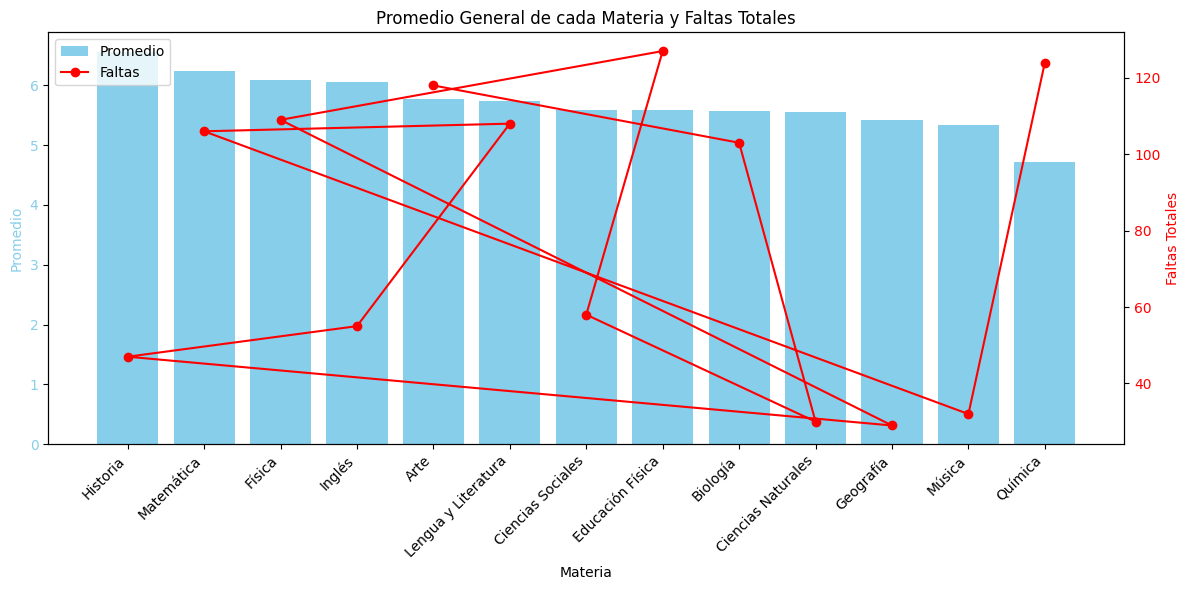

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio de cada materia
promedios_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)
promedios_materias = promedios_materias.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_materias = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para el promedio
ax1.bar(promedios_materias.index, promedios_materias.values, color='skyblue', label='Promedio')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de cada Materia y Faltas Totales')
plt.xticks(rotation=45, ha='right')

# Segundo eje para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_materias.index, faltas_materias.values, color='red', marker='o', label='Faltas')
ax2.set_ylabel('Faltas Totales', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)